![image.png](attachment:image.png)

##### **Good luck with taking your exam. Keep working and make your dreams all come true. Seeing the results of all of your hard work will make this struggle worth it. We’re all thinking of you.** 
<b><font color='blue'>AI-PRO Spark Team ITI</font></b>

## Objective:
- The objective from this project is to create a <b>Logistic Regression Classifier</b> to predict the <b>Stroke Condition</b>.
- <b>Stoke</b> is a condition in which either the blood flow to the brain stops or blood flow is excessive.
- It is required to obtain <b>ROC > 0.65</b>.

### Data:
- Data is provided in csv format in a file named <b>healthcare-dataset-stroke-data.csv</b>

### Column names and data types are as follow:
- id, integer.
- gender, string.
- age, double.
- hypertension, integer.
- heart_disease, integer.
- ever_married, string.
- work_type, string.
- Residence_type, string.
- avg_glucose_level, double.
- bmi, double.
- smoking_status, string.
- stroke, integer <b>(Target Label)</b>.
If the person has stroke the stroke label value is <b>"1"</b> otherwise <b>"0"</b>.

## To perform this task follow the following guiding steps:

### Create a spark session and import the required libraries

In [ ]:
#For google drive
#%%capture
!pip install pyspark
!pip install -U -q PyDrive
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://dlcdn.apache.org/spark/spark-3.0.3/spark-3.0.3-bin-hadoop3.2.tgz
!tar xf spark-3.0.3-bin-hadoop3.2.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.3-bin-hadoop3.2"

import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

     |████████████████████████████████| 281.3 MB 37 kB/s 
     |████████████████████████████████| 198 kB 61.2 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=3f50521db9dc76693184c65f75fa868eab8ab80bed3d8c9ce204bf551a4f4b8f
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [ ]:
#For google drive
from google.colab import drive
drive.mount('/content/drive')
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('stroke').getOrCreate()

Mounted at /content/drive


### Create a data schema programatically

In [ ]:
import pyspark.sql.types as t


schema = t.StructType([
      t.StructField('id', t.IntegerType(), False),
    t.StructField('gender', t.StringType(), True),
    t.StructField('age', t.DoubleType(), True),
    t.StructField('hypertension', t.IntegerType(), True),
    t.StructField('heart_disease', t.IntegerType(), True),
    t.StructField('ever_married', t.StringType(), True),
    t.StructField('work_type', t.StringType(), True),
    t.StructField('Residence_type', t.StringType(), True),
    t.StructField('avg_glucose_level', t.DoubleType(), True),
    t.StructField('bmi', t.DoubleType(), True),
    t.StructField('smoking_status', t.StringType(), True),
    t.StructField('stroke', t.IntegerType(), True)
])
schema

StructType(List(StructField(id,IntegerType,false),StructField(gender,StringType,true),StructField(age,DoubleType,true),StructField(hypertension,IntegerType,true),StructField(heart_disease,IntegerType,true),StructField(ever_married,StringType,true),StructField(work_type,StringType,true),StructField(Residence_type,StringType,true),StructField(avg_glucose_level,DoubleType,true),StructField(bmi,DoubleType,true),StructField(smoking_status,StringType,true),StructField(stroke,IntegerType,true)))

### Read the data using the standard DataReader (Key,Value) pairs format
- Provide the schema and any other required options.

In [ ]:
DATA_PATH = '/content/healthcare-dataset-stroke-data.csv'

df=(spark.read.format('csv')
    .schema(schema)
    .option('header','true')
    .load(DATA_PATH)
)
df

DataFrame[id: int, gender: string, age: double, hypertension: int, heart_disease: int, ever_married: string, work_type: string, Residence_type: string, avg_glucose_level: double, bmi: double, smoking_status: string, stroke: int]

### Explore the data 
#### You have to do the following:
- Print the Schema.
- Show the first 10 rows from the data.
- Explore null values and show how many null values in each column.
- Plot a count plot for the target label and <b>notice the graph</b>.
- Perform any additional EDA you find useful.

In [ ]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- stroke: integer (nullable = true)



In [ ]:
df.show(10)

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|  Male|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|51676|Female|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21|null|   never smoked|     1|
|31112|  Male|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|60182|Female|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
| 1665|Female|79.0|           1|            0|         

In [ ]:
from pyspark.sql.functions import isnan, when, count, col, isnull, max

null_values = df.select([count(when(isnull(c), c)).alias(c) for c in df.columns])
null_values.show()

+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
| id|gender|age|hypertension|heart_disease|ever_married|work_type|Residence_type|avg_glucose_level|bmi|smoking_status|stroke|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
|  0|     0|  0|           0|            0|           0|        0|             0|                0|201|             0|     0|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+



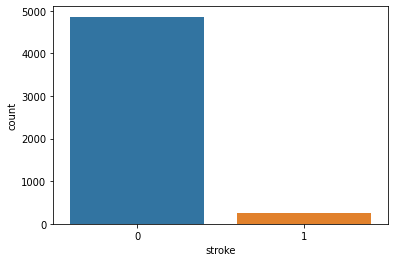

In [ ]:
# Plot a count plot for the target label and notice the graph.
import seaborn as sns
sns.countplot(x='stroke',data=df.toPandas())

### Get the summary statistics of the age column
- You will find the minimum age is about <b>0.08</b>.
- Remove rows for the age below <b>2 years old</b>.

In [ ]:
describe_df = df.describe()

In [ ]:
describe_df.select('summary','age').show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|              5110|
|   mean|43.226614481409015|
| stddev| 22.61264672311348|
|    min|              0.08|
|    max|              82.0|
+-------+------------------+



In [ ]:
df = df.where('age>2')

In [ ]:
describe_df = df.describe()
describe_df.select('summary','age').show()

+-------+-----------------+
|summary|              age|
+-------+-----------------+
|  count|             4935|
|   mean|44.70982776089159|
| stddev|21.56859737335159|
|    min|              3.0|
|    max|             82.0|
+-------+-----------------+



### Working with gender & smoking_status columns:
- Select and show the gender & smoking_status columns
- Get the distinct values for each column.

In [ ]:
df.select('gender','smoking_status').show()

+------+---------------+
|gender| smoking_status|
+------+---------------+
|  Male|formerly smoked|
|Female|   never smoked|
|  Male|   never smoked|
|Female|         smokes|
|Female|   never smoked|
|  Male|formerly smoked|
|  Male|   never smoked|
|Female|   never smoked|
|Female|        Unknown|
|Female|        Unknown|
|Female|   never smoked|
|Female|         smokes|
|Female|         smokes|
|  Male|        Unknown|
|Female|   never smoked|
|Female|   never smoked|
|  Male|         smokes|
|  Male|         smokes|
|Female|   never smoked|
|  Male|        Unknown|
+------+---------------+
only showing top 20 rows



In [ ]:
df.createOrReplaceTempView('DATA')

In [ ]:
spark.sql("SELECT gender FROM DATA GROUP BY gender").show()

+------+
|gender|
+------+
|Female|
| Other|
|  Male|
+------+



In [ ]:
spark.sql("SELECT smoking_status FROM DATA GROUP BY smoking_status").show()

+---------------+
| smoking_status|
+---------------+
|         smokes|
|        Unknown|
|   never smoked|
|formerly smoked|
+---------------+



#### Change the string values of the columns into numerical values as follow:
1. Gender column:
    * Male = 1 
    * Female = 0 
    * Other = 0 
2. Smoking Status column:
  * never smoked = 0
  * Unknown = 0.5
  * formerly smoked = 0.75
  * smokes = 1.0


In [ ]:
df=df.replace(['Male', 'Female','Other'], ['1','0','0'], 'gender')
df=df.replace(['never smoked', 'Unknown','formerly smoked','smokes'], ['0','0.5','0.75','1.0'], 'smoking_status')


In [ ]:
df=df.withColumn("gender",df.gender.cast(t.IntegerType()))
df=df.withColumn("smoking_status",df.smoking_status.cast(t.DoubleType()))

In [ ]:
df.show()

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+--------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi|smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+--------------+------+
| 9046|     1|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|          0.75|     1|
|51676|     0|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21|null|           0.0|     1|
|31112|     1|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|           0.0|     1|
|60182|     0|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|           1.0|     1|
| 1665|     0|79.0|           1|            0|         Yes|Sel

#### Show the output DataFrame
- Select and show the gender & smoking_status columns after value changing.
- Print schema for the new dataframe.

In [ ]:
df.createOrReplaceTempView('DATA')
spark.sql("SELECT gender,smoking_status FROM DATA").show()

+------+--------------+
|gender|smoking_status|
+------+--------------+
|     1|          0.75|
|     0|           0.0|
|     1|           0.0|
|     0|           1.0|
|     0|           0.0|
|     1|          0.75|
|     1|           0.0|
|     0|           0.0|
|     0|           0.5|
|     0|           0.5|
|     0|           0.0|
|     0|           1.0|
|     0|           1.0|
|     1|           0.5|
|     0|           0.0|
|     0|           0.0|
|     1|           1.0|
|     1|           1.0|
|     0|           0.0|
|     1|           0.5|
+------+--------------+
only showing top 20 rows



In [ ]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: double (nullable = true)
 |-- stroke: integer (nullable = true)



### Deal with null value according to your data analysis.

In [ ]:
mean_bmi = df.select('bmi').agg({'bmi':'mean'}).collect()[0][0]
mean_bmi

29.257489451476793

In [ ]:
df = df.na.fill(mean_bmi, subset='bmi')
df.select('bmi').show()

+------------------+
|               bmi|
+------------------+
|              36.6|
|29.257489451476793|
|              32.5|
|              34.4|
|              24.0|
|              29.0|
|              27.4|
|              22.8|
|29.257489451476793|
|              24.2|
|              29.7|
|              36.8|
|              27.3|
|29.257489451476793|
|              28.2|
|              30.9|
|              37.5|
|              25.8|
|              37.8|
|29.257489451476793|
+------------------+
only showing top 20 rows



### Split the data into training and test dataframes:
- 80% training and 20% test.
- seed = 42.
- Save each dataframe as a parquet file

In [ ]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier

In [ ]:
X_train, X_test = df.randomSplit([0.8,0.2],seed=0)
print(f"There are {X_train.count()} rows in the training set, and {X_test.count()} in the test set.")

There are 3912 rows in the training set, and 1023 in the test set.


### Read the saved Train and Test DataFrame:
- Use the dataframes you read in the subsequent steps.

In [ ]:
X_train.show()

+---+------+----+------------+-------------+------------+-------------+--------------+-----------------+------------------+--------------+------+
| id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level|               bmi|smoking_status|stroke|
+---+------+----+------------+-------------+------------+-------------+--------------+-----------------+------------------+--------------+------+
| 67|     0|17.0|           0|            0|          No|      Private|         Urban|            92.97|29.257489451476793|          0.75|     0|
| 77|     0|13.0|           0|            0|          No|     children|         Rural|            85.81|              18.6|           0.5|     0|
| 84|     1|55.0|           0|            0|         Yes|      Private|         Urban|            89.17|              31.5|           0.0|     0|
| 91|     0|42.0|           0|            0|          No|      Private|         Urban|            98.53|              18.5| 

In [ ]:
X_test.show()

+----+------+----+------------+-------------+------------+-------------+--------------+-----------------+------------------+--------------+------+
|  id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level|               bmi|smoking_status|stroke|
+----+------+----+------------+-------------+------------+-------------+--------------+-----------------+------------------+--------------+------+
| 298|     0|41.0|           0|            0|         Yes|Self-employed|         Rural|            76.66|29.257489451476793|           0.5|     0|
| 315|     1|45.0|           0|            0|         Yes|      Private|         Rural|            65.42|              39.7|           0.0|     0|
| 365|     0|44.0|           1|            0|         Yes|      Private|         Rural|            69.48|              41.3|           0.0|     0|
| 394|     1|78.0|           1|            0|         Yes|Self-employed|         Rural|            75.19|             

In [ ]:
categoricalColumns = [col for (col, dtype) in X_train.dtypes
                   if dtype == "string"]
categoricalColumns

['ever_married', 'work_type', 'Residence_type']

In [ ]:
indexOutputColumns = [x + "_Index" for x in categoricalColumns]
indexOutputColumns

['ever_married_Index', 'work_type_Index', 'Residence_type_Index']

In [ ]:
oheOutputColumns = [x + "_OHE" for x in categoricalColumns]
oheOutputColumns

['ever_married_OHE', 'work_type_OHE', 'Residence_type_OHE']

In [ ]:
stringIndexer = StringIndexer(inputCols=categoricalColumns,
                             outputCols=indexOutputColumns,
                             handleInvalid='skip')
oheEncoder = OneHotEncoder(inputCols=indexOutputColumns,
                          outputCols=oheOutputColumns)

In [ ]:
numericColumns = [field for (field,dataType) in X_train.dtypes
              if ((dataType=='double'or dataType=='int' and field!='stroke'))]
numericColumns      

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [ ]:
assemblerInputs = oheOutputColumns + numericColumns
assemblerInputs

['ever_married_OHE',
 'work_type_OHE',
 'Residence_type_OHE',
 'id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [ ]:
from pyspark.ml.feature import VectorAssembler

vecAssembler = VectorAssembler(inputCols=assemblerInputs,outputCol='features')

### Create the model:
- Perform feature engineering steps.
- Create the logistic regression classifier.
- Build the pipeline model that uses all feature engineering steps and the model.
- Train the pipeline model using the trainig dataset.

In [ ]:
from pyspark.ml.classification import LogisticRegression


In [ ]:
from pyspark.ml import Pipeline
lg = LogisticRegression(featuresCol='features', labelCol='stroke', predictionCol='prediction')
pipeline =Pipeline(stages = [stringIndexer,oheEncoder,vecAssembler,lg])

In [ ]:
pipelineModel = pipeline.fit(X_train)

### Perform predictions on tests dataframe:
- Test the model using the test dataframe
- Select and show the feature column.
- Print the schema of the output dataframe.
- Select and show both prediction and label columns.
- Explore the results for the label column stroke=1. i.e. select both columns (prediction,stroke) for stroke=1.<b>notice the result.</b> 
- Count the predicted 1 and 0 values.<b>notice the result.</b>   

In [ ]:
predDF = pipelineModel.transform(X_test)

In [ ]:
predDF.select('features','stroke','prediction').show(5)

+--------------------+------+----------+
|            features|stroke|prediction|
+--------------------+------+----------+
|(14,[0,2,6,8,11,1...|     0|       0.0|
|(14,[0,1,6,7,8,11...|     0|       0.0|
|(14,[0,1,6,8,9,11...|     0|       0.0|
|(14,[0,2,6,7,8,9,...|     0|       0.0|
|(14,[0,1,6,8,11,1...|     0|       0.0|
+--------------------+------+----------+
only showing top 5 rows



### Evaluate the model performance
- Use <b>BinaryClassificationEvaluator</b>. This will calculate the <b>ROC</b>.
- Set the parameters as follow:
    - <b>rawPredictionCol='prediction'</b> and <b>labelCol='stroke'</b>

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [ ]:
evaluatorROC = BinaryClassificationEvaluator(rawPredictionCol='prediction'
                                             ,labelCol='stroke')

In [ ]:
evaluatorROC.evaluate(predDF)

0.49948400412796695

In [ ]:
stroke0=df.select('stroke').where(col('stroke')==0).count()

In [ ]:
stroke1=df.select('stroke').where(col('stroke')==1).count()

In [ ]:
total_no=df.select('stroke').count()

In [ ]:
model.summary.areaUnderROC

Probability of stroke==0: 0.9497467071935157 ,Probability of stroke==1: 0.050253292806484294


In [ ]:
def weightCol(x):
    if x==0:
        return 1-prob_stroke0
    else:
        return 1-prob_stroke1

In [ ]:
from pyspark.sql.functions import udf
convertUDF = udf(lambda z: weightCol(z),t.DoubleType())

In [ ]:
df.select(col("stroke"), 
    convertUDF(col("stroke")).alias("weightCol") ) \
   .show(truncate=False)

+------+------------------+
|stroke|weightCol         |
+------+------------------+
|1     |0.9497467071935157|
|1     |0.9497467071935157|
|1     |0.9497467071935157|
|1     |0.9497467071935157|
|1     |0.9497467071935157|
|1     |0.9497467071935157|
|1     |0.9497467071935157|
|1     |0.9497467071935157|
|1     |0.9497467071935157|
|1     |0.9497467071935157|
|1     |0.9497467071935157|
|1     |0.9497467071935157|
|1     |0.9497467071935157|
|1     |0.9497467071935157|
|1     |0.9497467071935157|
|1     |0.9497467071935157|
|1     |0.9497467071935157|
|1     |0.9497467071935157|
|1     |0.9497467071935157|
|1     |0.9497467071935157|
+------+------------------+
only showing top 20 rows



# GOOD LUCK
<b><font color='GREEN'>AI-PRO Spark Team ITI</font></b>

![image-3.png](attachment:image-3.png)